<a href="https://colab.research.google.com/github/ikonushok/AI-Traiding/blob/main/Pivot_points_POLY_1h.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install & Imports

In [1]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr 
import matplotlib.pyplot as plt

from IPython.display import clear_output

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install yfinance
#!conda install -c ranaroussi yfinance --y
import yfinance as yf # requires yfinance - pip install yfinance
clear_output()

In [4]:
!pip install backtesting
clear_output()

# Библиоетки backtesting
from backtesting import Backtest, Strategy

In [5]:
!curl --remote-name --location https://raw.githubusercontent.com/chekh/ai_tr_libs/main/Long_n_short_strategy.py
!curl --remote-name --location https://raw.githubusercontent.com/chekh/ai_tr_libs/main/Long_strategy.py
clear_output()
    
# Библиотеки из ai_tr_libs
from Long_n_short_strategy import Long_n_Short_Strategy as LnS
from Long_strategy import Long_Strategy as LS

# 1h: counter_lvl = 8

## Загружаем данные

In [8]:
# Начните с активации обходного пути Yahoo Finance и установки начальной и конечной точек фрейма данных.
# здесь Yf.pdr_override () активирует ваши условия обходного пути, а остальное установит ваш фрейм данных.
yf.pdr_override()
start = dt.datetime(2020,1, 1)
now = dt.datetime.now()
interval = '1h'
stock = 'POLY.ME'

buy_signals = pd.DataFrame() # dataframe для записи сигналов
sell_signals = pd.DataFrame() # dataframe для записи сигналов

In [18]:
df = pdr.get_data_yahoo(stock,
                        start,
                        now,
                        interval = interval) # interval=60min is not supported. Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]
del df['Adj Close'], df['Volume']
df.index.name = 'Date'
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2020-01-03 09:30:00+03:00,978.400024,980.000000,967.099976,976.200012
2020-01-03 10:30:00+03:00,976.000000,984.599976,973.099976,982.500000
2020-01-03 11:30:00+03:00,983.000000,983.099976,980.299988,981.200012
2020-01-03 12:30:00+03:00,981.700012,984.000000,980.200012,982.200012
2020-01-03 13:30:00+03:00,983.000000,988.599976,982.799988,986.400024
...,...,...,...,...
2021-05-21 14:30:00+03:00,1793.400024,1801.000000,1793.400024,1797.900024
2021-05-21 15:30:00+03:00,1798.000000,1801.500000,1784.000000,1784.000000
2021-05-21 16:30:00+03:00,1784.099976,1792.800049,1770.400024,1773.500000


## Разметка Y

In [10]:
from markup_y import SELL, BUY

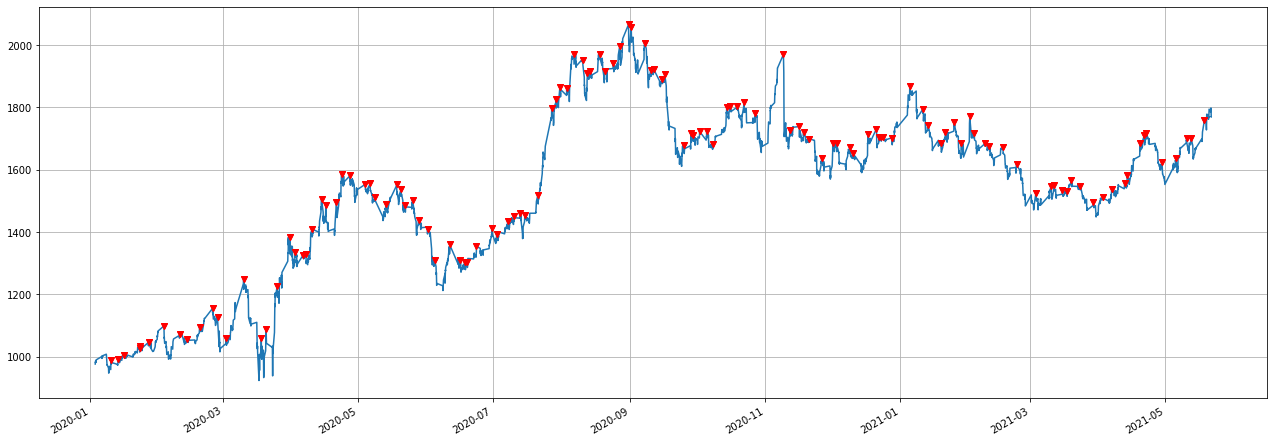

,price,Signal
Date,,
2020-01-10 12:30:00+03:00,987.7,-1
2020-01-13 18:30:00+03:00,991.2,-1
2020-01-16 09:30:00+03:00,1004.5,-1
2020-01-23 09:30:00+03:00,1035.5,-1
2020-01-23 18:30:00+03:00,1028.4,-1
...,...,...
2021-04-29 09:30:00+03:00,1624.2,-1
2021-05-05 18:30:00+03:00,1637.3,-1
2021-05-10 15:30:00+03:00,1702.8,-1


In [11]:
sell_signals = SELL(df, counter_lvl = 8)
sell_signals = sell_signals.set_index('Date')
sell_signals

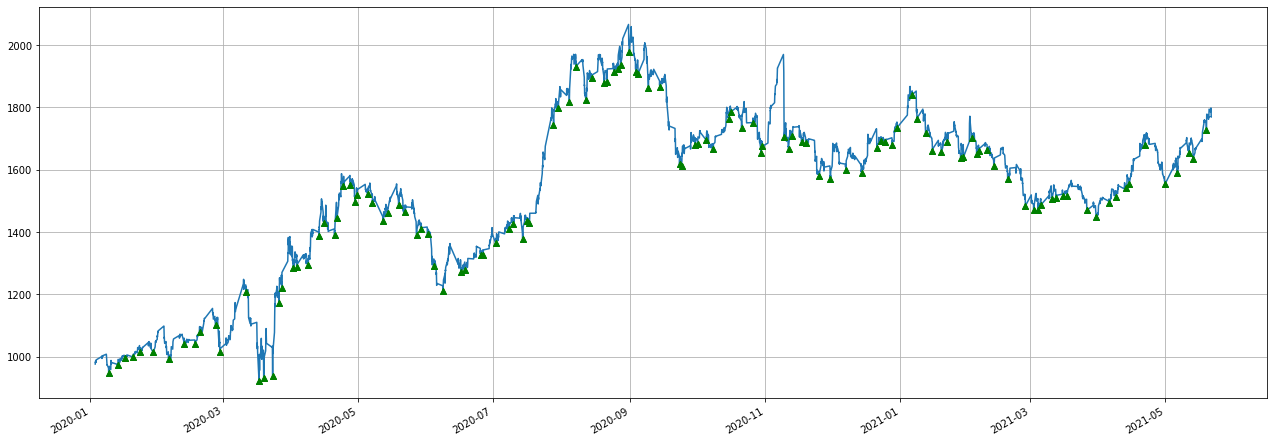

,price,Signal
Date,,
2020-01-09 11:30:00+03:00,946.9,1
2020-01-13 13:30:00+03:00,972.5,1
2020-01-16 16:30:00+03:00,994.5,1
2020-01-20 09:30:00+03:00,999.0,1
2020-01-23 13:30:00+03:00,1015.4,1
...,...,...
2021-04-30 18:30:00+03:00,1552.4,1
2021-05-06 09:30:00+03:00,1590.2,1
2021-05-11 15:30:00+03:00,1652.3,1


In [12]:
buy_signals = BUY(df, counter_lvl = 8)
buy_signals = buy_signals.set_index('Date')
buy_signals

## Обьединение датафреймов

In [16]:
signals = sell_signals.append(buy_signals)
signals

,price,Signal
Date,,
2020-01-10 12:30:00+03:00,987.7,-1
2020-01-13 18:30:00+03:00,991.2,-1
2020-01-16 09:30:00+03:00,1004.5,-1
2020-01-23 09:30:00+03:00,1035.5,-1
2020-01-23 18:30:00+03:00,1028.4,-1
...,...,...
2021-04-30 18:30:00+03:00,1552.4,1
2021-05-06 09:30:00+03:00,1590.2,1
2021-05-11 15:30:00+03:00,1652.3,1


In [19]:
df_new = df

df_new = pd.merge(df_new, signals['Signal'], on=('Date'), how ='left')
df_new = df_new.fillna(0)
df_new.loc[df_new['Signal'] != 0]

,Open,High,Low,Close,Signal
Date,,,,,
2020-01-09 11:30:00+03:00,952.400024,953.000000,945.000000,946.900024,1.0
2020-01-10 12:30:00+03:00,980.299988,989.000000,980.000000,987.700012,-1.0
2020-01-13 13:30:00+03:00,973.500000,975.900024,972.000000,972.500000,1.0
2020-01-13 18:30:00+03:00,987.000000,991.200012,986.700012,991.200012,-1.0
2020-01-16 09:30:00+03:00,995.200012,1004.900024,995.099976,1004.500000,-1.0
...,...,...,...,...,...
2021-05-11 15:30:00+03:00,1665.500000,1667.699951,1645.300049,1652.300049,1.0
2021-05-12 16:30:00+03:00,1691.500000,1706.199951,1690.300049,1701.500000,-1.0
2021-05-13 14:30:00+03:00,1634.000000,1638.900024,1631.699951,1633.699951,1.0


## График торговли

### Long

In [20]:
# Стратегия Long & Short (подключен класс стратегии LnS)
bt = Backtest(df_new, LS, cash=100000, commission=.004, trade_on_close=True)
stats = bt.run()
bt.plot(plot_volume=True, relative_equity=True)

ValueError: ignored

In [21]:
stats

Start                     2020-01-03 09:30...
End                       2021-05-21 17:38...
Duration                    504 days 08:08:33
Exposure Time [%]                      51.474
Equity Final [$]                  4.94101e+06
Equity Peak [$]                   5.03166e+06
Return [%]                            4841.01
Buy & Hold Return [%]                 80.8543
Return (Ann.) [%]                     1612.56
Volatility (Ann.) [%]                 545.102
Sharpe Ratio                          2.95827
Sortino Ratio                         146.934
Calmar Ratio                          65.8178
Max. Drawdown [%]                    -24.5004
Avg. Drawdown [%]                   -0.602762
Max. Drawdown Duration       13 days 21:00:00
Avg. Drawdown Duration        0 days 16:00:00
# Trades                                  106
Win Rate [%]                          96.2264
Best Trade [%]                        30.1233
Worst Trade [%]                      -12.5927
Avg. Trade [%]                    

### Long & Short

In [22]:
# Стратегия Long & Short (подключен класс стратегии LnS)
bt = Backtest(df_new, LnS, cash=100000, commission=.004, trade_on_close=True)
stats = bt.run()
bt.plot(plot_volume=True, relative_equity=True)

ValueError: ignored

In [23]:
stats

Start                     2020-01-03 09:30...
End                       2021-05-21 17:38...
Duration                    504 days 08:08:33
Exposure Time [%]                     52.8035
Equity Final [$]                  4.82905e+06
Equity Peak [$]                   4.82905e+06
Return [%]                            4729.05
Buy & Hold Return [%]                 80.8543
Return (Ann.) [%]                     1584.21
Volatility (Ann.) [%]                   529.5
Sharpe Ratio                           2.9919
Sortino Ratio                          168.28
Calmar Ratio                          80.6729
Max. Drawdown [%]                    -19.6375
Avg. Drawdown [%]                   -0.628965
Max. Drawdown Duration       16 days 23:00:00
Avg. Drawdown Duration        0 days 17:00:00
# Trades                                  118
Win Rate [%]                          96.6102
Best Trade [%]                        30.1233
Worst Trade [%]                      -14.2684
Avg. Trade [%]                    

# 1h: Подбор оптимального counter_lvl

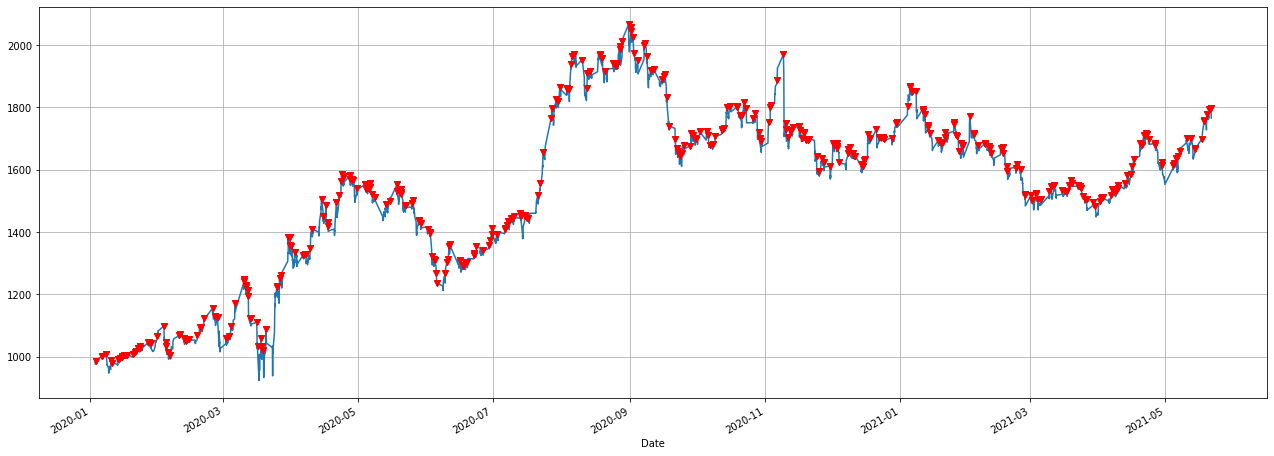

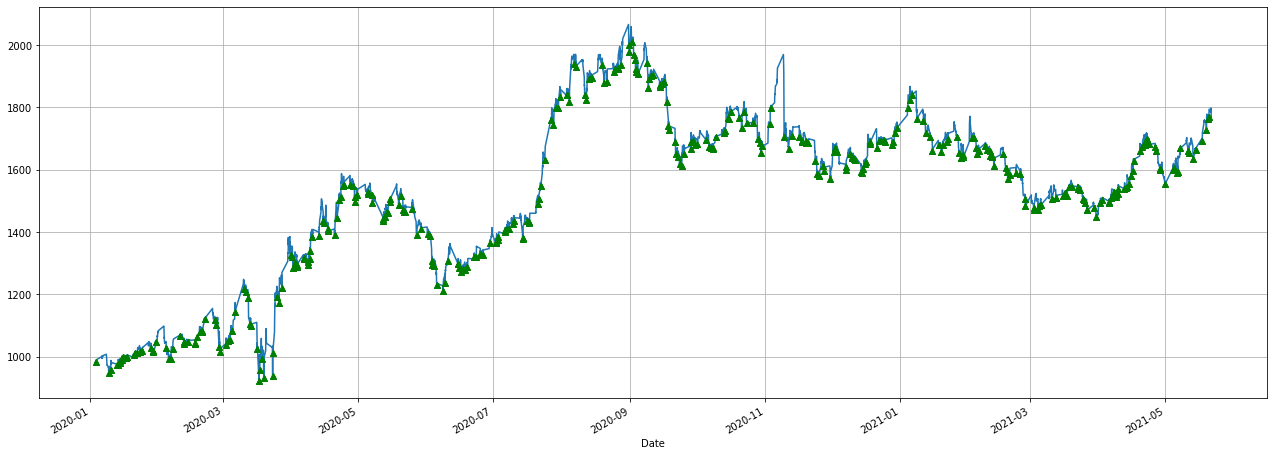

counter_lvl = 2 
 Return [%]                  74216
Buy & Hold Return [%]     80.8543
Return (Ann.) [%]         12222.8
Volatility (Ann.) [%]     4343.68
Sharpe Ratio              2.81393
Sortino Ratio             2705.33
Calmar Ratio              2594.01
Max. Drawdown [%]        -4.71192
Avg. Drawdown [%]       -0.404438
dtype: object




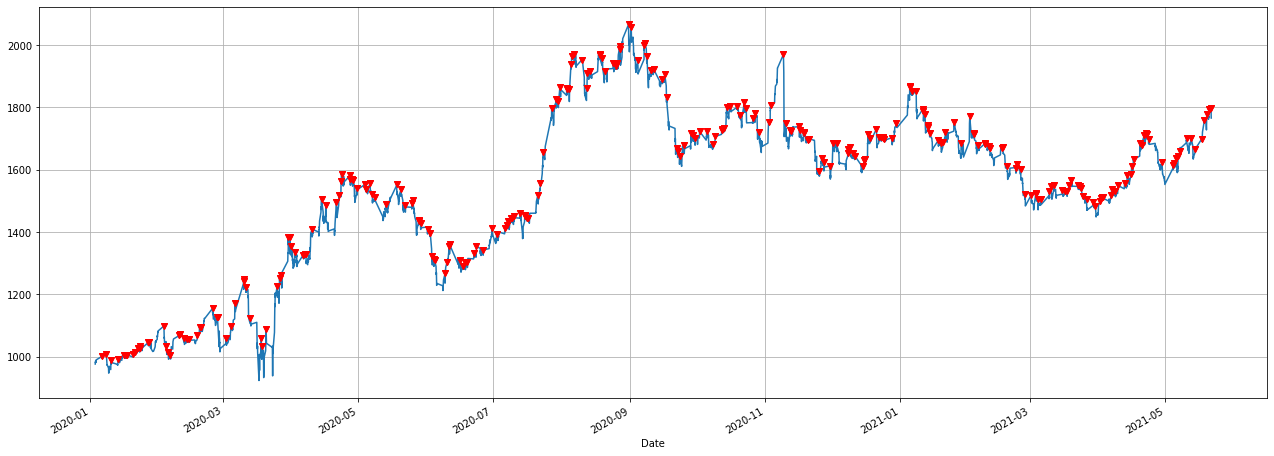

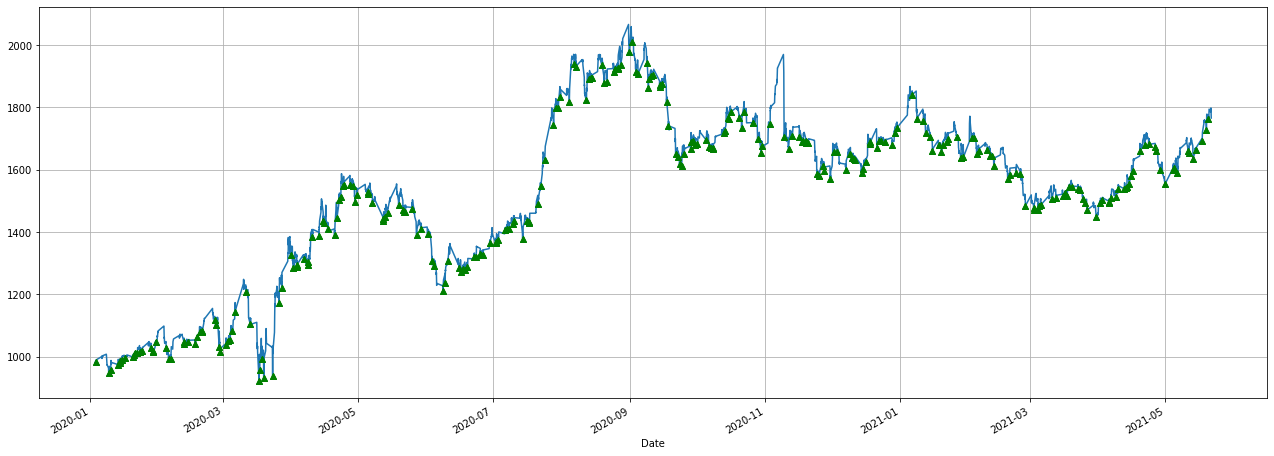

counter_lvl = 3 
 Return [%]                37327.1
Buy & Hold Return [%]     80.8543
Return (Ann.) [%]         7361.28
Volatility (Ann.) [%]     2688.66
Sharpe Ratio               2.7379
Sortino Ratio             1082.17
Calmar Ratio              1220.01
Max. Drawdown [%]         -6.0338
Avg. Drawdown [%]       -0.463715
dtype: object




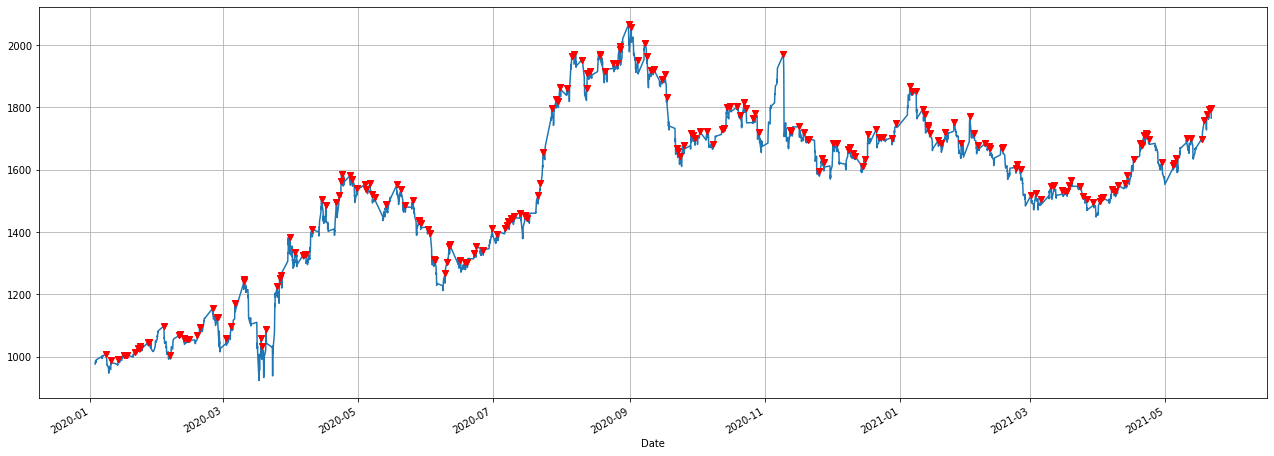

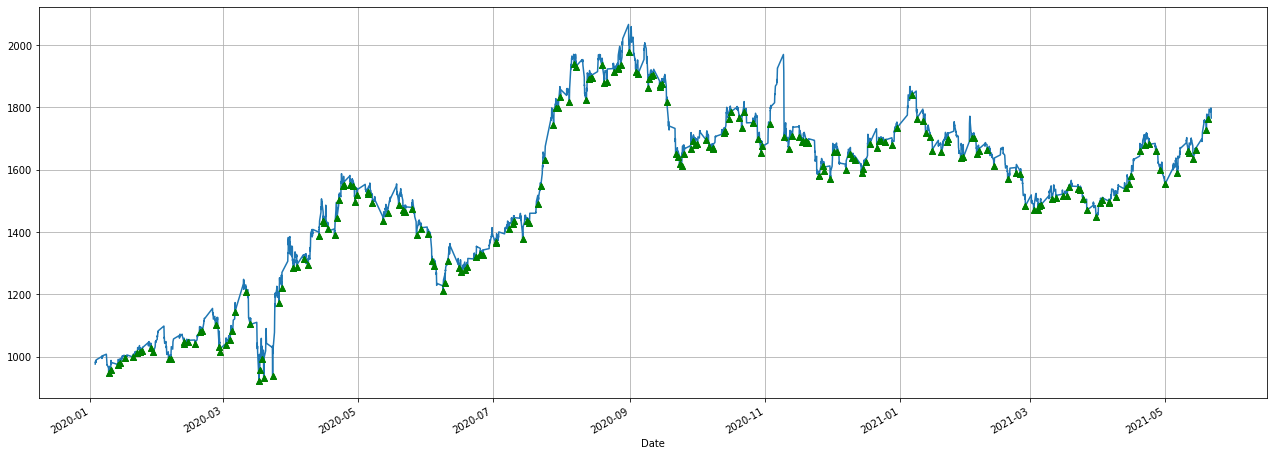

counter_lvl = 4 
 Return [%]               12793.6
Buy & Hold Return [%]    80.8543
Return (Ann.) [%]        3343.79
Volatility (Ann.) [%]     1137.4
Sharpe Ratio             2.93986
Sortino Ratio            361.237
Calmar Ratio              188.21
Max. Drawdown [%]       -17.7662
Avg. Drawdown [%]       -0.53239
dtype: object




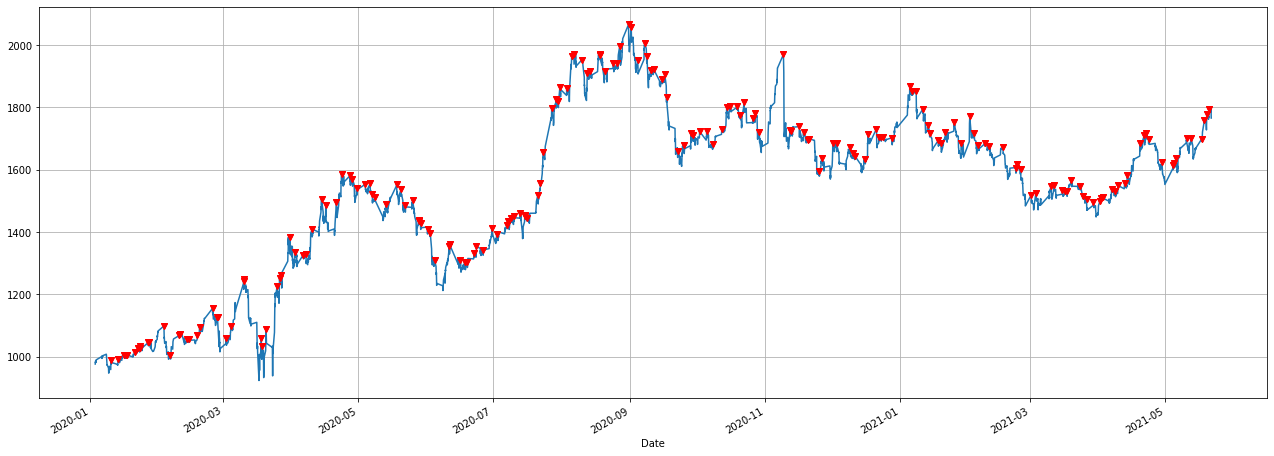

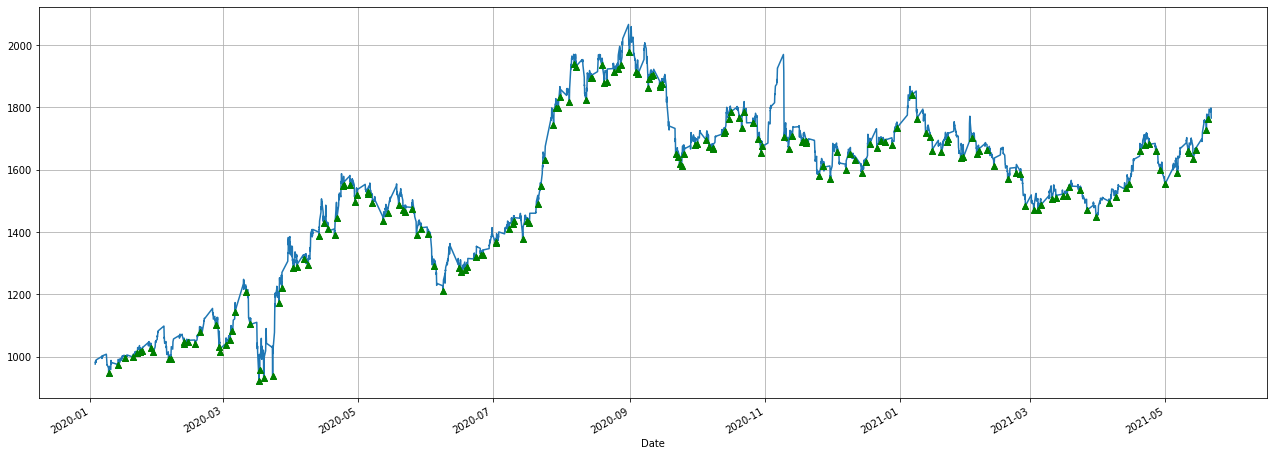

counter_lvl = 5 
 Return [%]                8447.38
Buy & Hold Return [%]     80.8543
Return (Ann.) [%]          2452.7
Volatility (Ann.) [%]     722.954
Sharpe Ratio              3.39261
Sortino Ratio             310.457
Calmar Ratio              137.762
Max. Drawdown [%]        -17.8038
Avg. Drawdown [%]       -0.517607
dtype: object




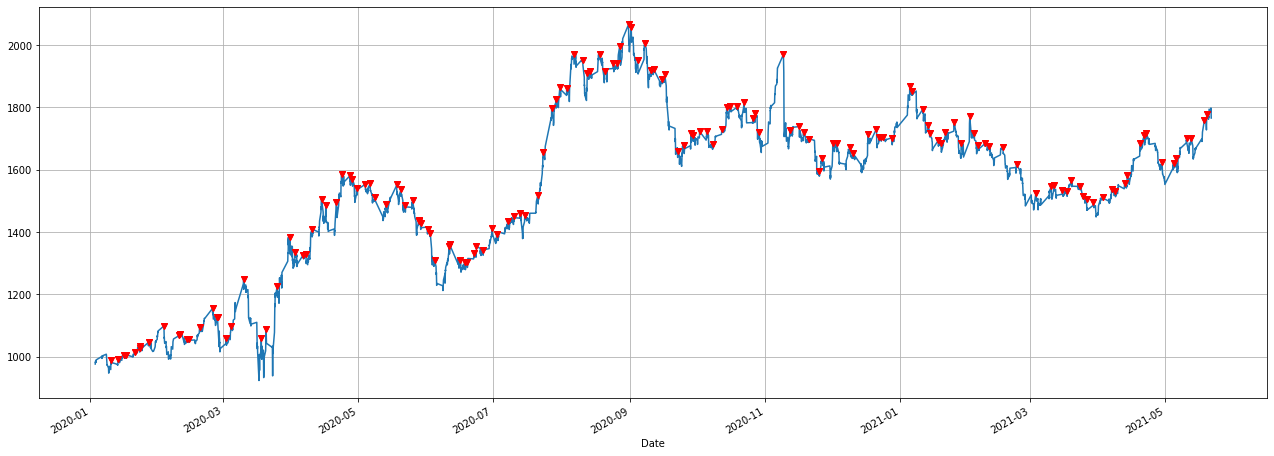

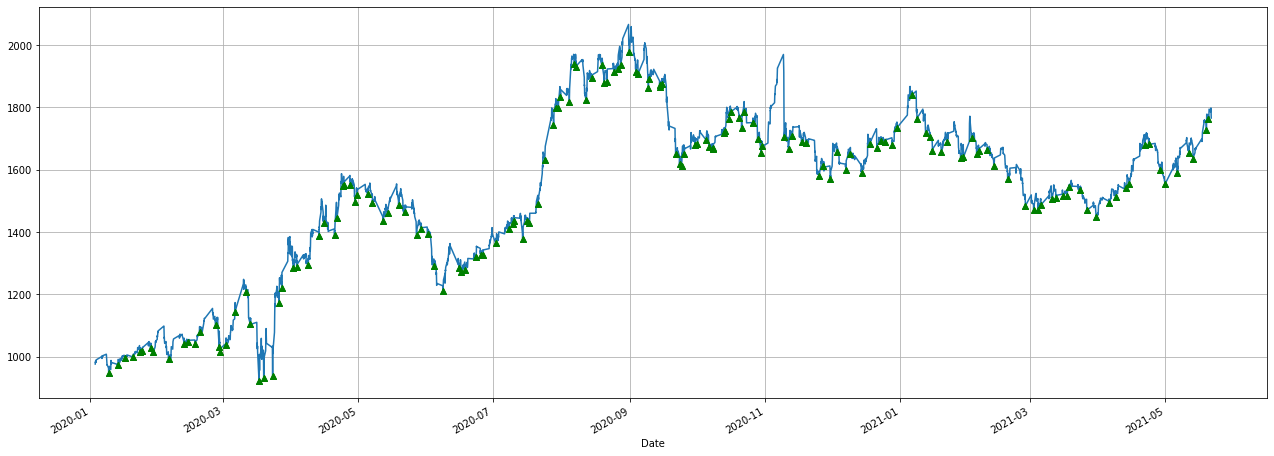

counter_lvl = 6 
 Return [%]                7486.61
Buy & Hold Return [%]     80.8543
Return (Ann.) [%]         2240.36
Volatility (Ann.) [%]     765.472
Sharpe Ratio              2.92677
Sortino Ratio             217.828
Calmar Ratio              91.4415
Max. Drawdown [%]        -24.5005
Avg. Drawdown [%]       -0.577889
dtype: object




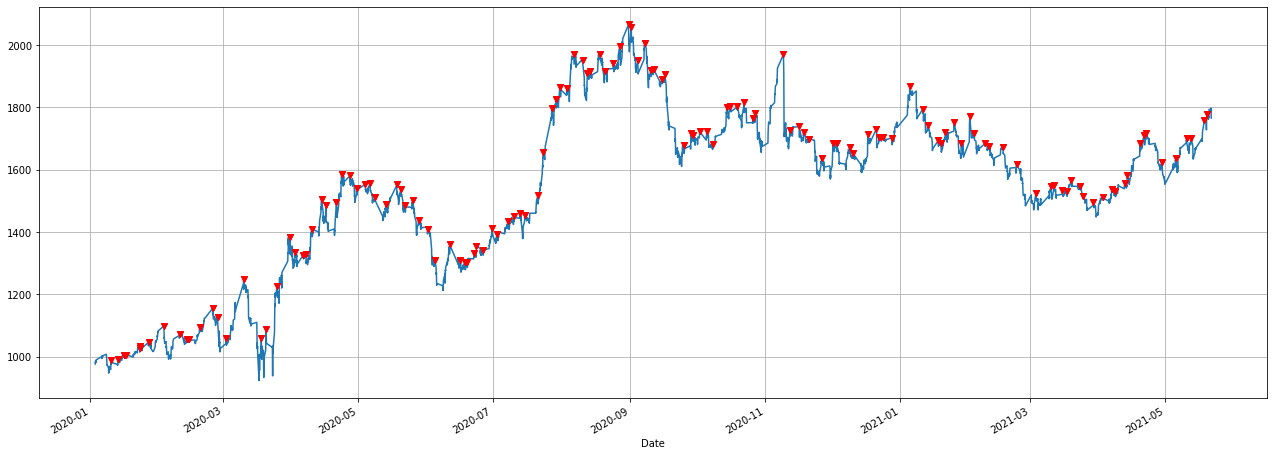

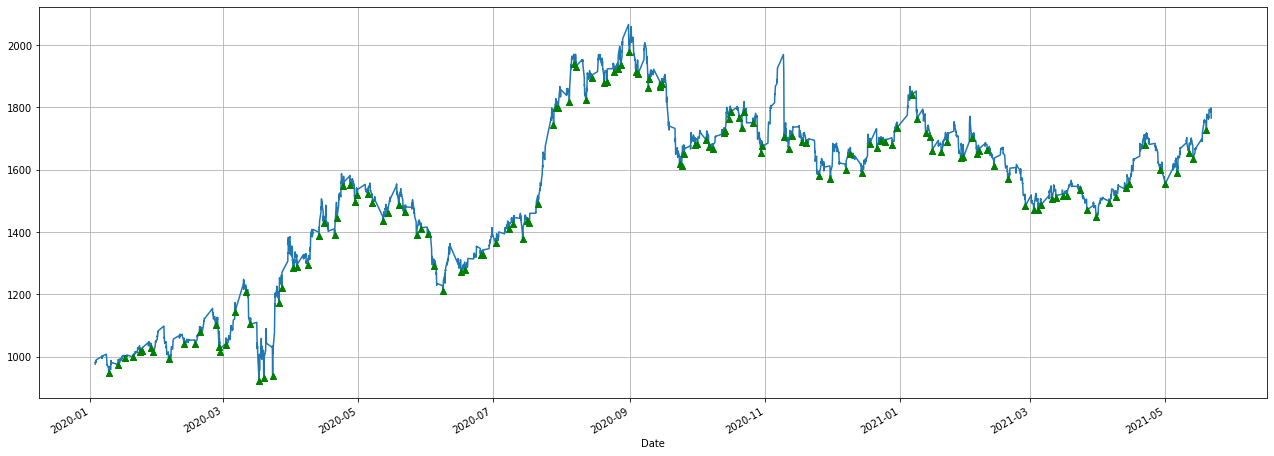

counter_lvl = 7 
 Return [%]                5200.91
Buy & Hold Return [%]     80.8543
Return (Ann.) [%]         1702.54
Volatility (Ann.) [%]     579.822
Sharpe Ratio              2.93632
Sortino Ratio             151.152
Calmar Ratio              69.4427
Max. Drawdown [%]        -24.5172
Avg. Drawdown [%]       -0.605473
dtype: object




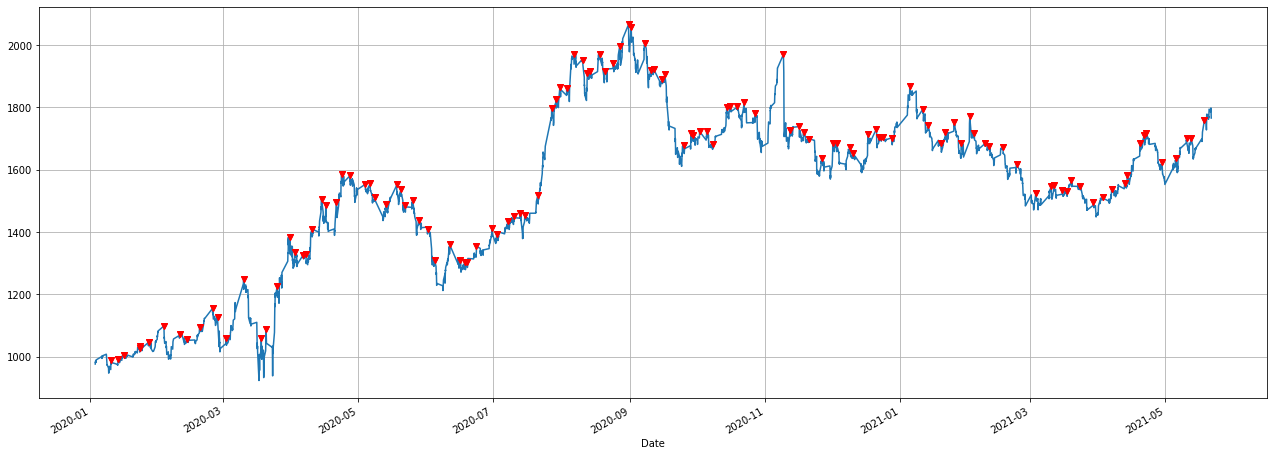

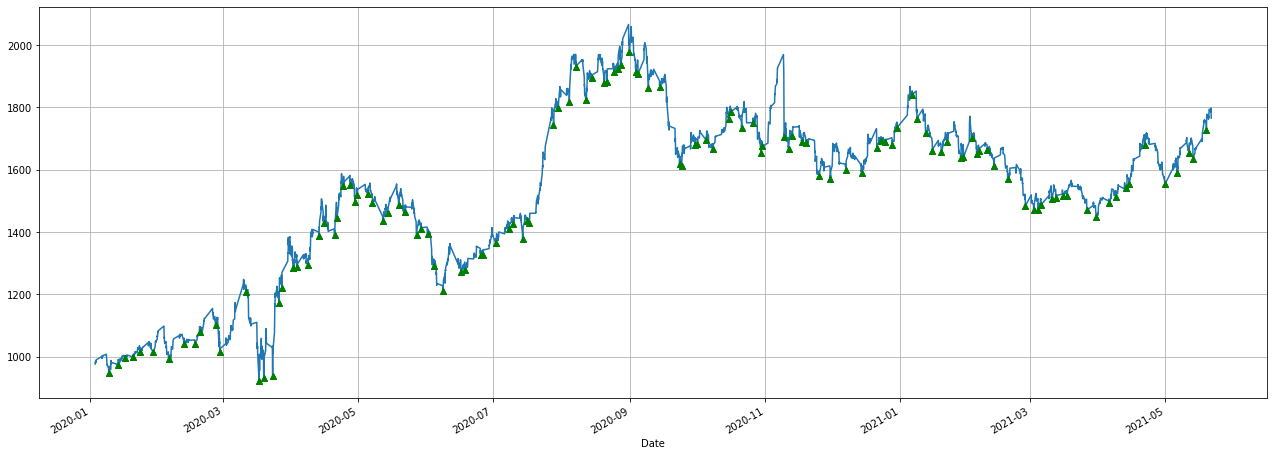

counter_lvl = 8 
 Return [%]                4729.05
Buy & Hold Return [%]     80.8543
Return (Ann.) [%]         1584.21
Volatility (Ann.) [%]       529.5
Sharpe Ratio               2.9919
Sortino Ratio              168.28
Calmar Ratio              80.6729
Max. Drawdown [%]        -19.6375
Avg. Drawdown [%]       -0.628965
dtype: object



In [24]:
LnS_results = pd.DataFrame() # dataframe для записи результатов подбора оптимального окна counter_lvl

for i in range(2, 9):
    
    # Разметим Y
    sell_signals = SELL(df, counter_lvl = i)
    sell_signals = sell_signals.set_index('Date')
    buy_signals = BUY(df, counter_lvl = i)
    buy_signals = buy_signals.set_index('Date')
    
    # Обьединим датафреймы
    signals = sell_signals.append(buy_signals)
    df_new = df

    df_new = pd.merge(df_new, signals['Signal'], on=('Date'), how ='left')
    df_new = df_new.fillna(0)
    df_new.loc[df_new['Signal'] != 0]
    
    # Backtesting
    # Стратегия Long & Short (подключен класс стратегии LnS)
    bt = Backtest(df_new, LnS, cash=100000, commission=.004, trade_on_close=True)
    stats = bt.run()
    
    print('counter_lvl =', i, '\n', stats[6:15])
    print('='*100)
    print()
    
    line = pd.DataFrame({'counter_lvl':[i],
                         'Trades':[stats[17]],
                         'Return [%]':[stats[6]],
                         'Buy & Hold Return [%]':[stats[7]],
                         'Return (Ann.) [%]':[stats[8]],
                         'Sharpe Ratio':[stats[10]],
                         'Sortino Ratio':[stats[11]],
                         'Calmar Ratio':[stats[12]],
                         'Max. Drawdown [%]':[stats[13]],
                         'Avg. Drawdown [%]]':[stats[14]],
                         'Win Rate [%]':[stats[18]]
                        })
    LnS_results = LnS_results.append(line, ignore_index=True)
    

In [25]:
LnS_results

,counter_lvl,Trades,Return [%],Buy & Hold Return [%],Return (Ann.) [%],Sharpe Ratio,Sortino Ratio,Calmar Ratio,Max. Drawdown [%],Avg. Drawdown [%]],Win Rate [%]
0,2,343,74216.046218,80.854331,12222.785950,2.813926,2705.325128,2594.011165,-4.711925,-0.404438,96.501458
1,3,257,37327.066935,80.854331,7361.275766,2.737903,1082.166508,1220.006951,-6.033798,-0.463715,96.498054
2,4,211,12793.623649,80.854331,3343.785709,2.939860,361.237238,188.210485,-17.766203,-0.532390,96.208531
3,5,179,8447.375940,80.854331,2452.699045,3.392609,310.457434,137.762383,-17.803837,-0.517607,98.324022
4,6,149,7486.605846,80.854331,2240.362689,2.926773,217.828203,91.441531,-24.500494,-0.577889,95.973154
5,7,135,5200.906397,80.854331,1702.540660,2.936317,151.152474,69.442687,-24.517206,-0.605473,94.814815
6,8,118,4729.047430,80.854331,1584.209900,2.991896,168.279520,80.672864,-19.637457,-0.628965,96.610169
